In [1]:
!pip install medmnist
from mnist_loader import get_data
from alexnet128 import AlexNet128
from train import train_model
import torch
import torch.nn as nn


In [2]:
model = AlexNet128()

In [4]:
train_loader, val_loader, test_loader = get_data(im_size=128, batch_size=512)

100%|██████████| 4.26G/4.26G [03:25<00:00, 20.8MB/s]


In [5]:
optimizer = torch.optim.Adam(params= model.parameters(), lr = 1e-3, weight_decay=0.00001)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
trained_model, history = train_model(model, train_loader, val_loader, optimizer, criterion, patience=10, epochs=100)

Epoch 01 | Train Loss: 1.2637, Train Acc: 51.41%  | Val Loss: 0.7035, Val Acc: 73.44%
Epoch 02 | Train Loss: 0.5413, Train Acc: 80.37%  | Val Loss: 0.3619, Val Acc: 87.28%
Epoch 03 | Train Loss: 0.3343, Train Acc: 88.40%  | Val Loss: 0.2612, Val Acc: 91.24%
Epoch 04 | Train Loss: 0.2452, Train Acc: 91.60%  | Val Loss: 0.1853, Val Acc: 93.72%
Epoch 05 | Train Loss: 0.2050, Train Acc: 93.10%  | Val Loss: 0.1830, Val Acc: 93.45%
Epoch 06 | Train Loss: 0.1701, Train Acc: 94.25%  | Val Loss: 0.1711, Val Acc: 94.44%
Epoch 07 | Train Loss: 0.1500, Train Acc: 94.97%  | Val Loss: 0.1453, Val Acc: 95.06%
Epoch 08 | Train Loss: 0.1382, Train Acc: 95.39%  | Val Loss: 0.1298, Val Acc: 95.54%
Epoch 09 | Train Loss: 0.1231, Train Acc: 95.89%  | Val Loss: 0.1062, Val Acc: 96.41%
Epoch 10 | Train Loss: 0.1102, Train Acc: 96.35%  | Val Loss: 0.1391, Val Acc: 95.58%
No improvement in validation loss for 1/10 epochs.
Epoch 11 | Train Loss: 0.0988, Train Acc: 96.66%  | Val Loss: 0.1204, Val Acc: 96.00%
No 

In [7]:
torch.save(trained_model.state_dict(), "alexnet128_pathmnist.pth")

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# 2. Switch to evaluation mode
trained_model.eval()

# 3. Initialize tracking variables
test_loss = 0.0
correct   = 0
total     = 0

# We'll also collect all preds & labels if you want a full report
all_preds  = []
all_labels = []

# 4. Evaluate
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device).squeeze()
        outputs, _ = model(inputs)

        # accumulate loss
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        # get predictions
        _, preds = torch.max(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total   += labels.size(0)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

# 5. Compute metrics
avg_test_loss = test_loss / total
test_accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Optional: more detailed classification report & confusion matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

Test Loss: 0.3484
Test Accuracy: 91.1978%

Classification Report:
              precision    recall  f1-score   support

           0     0.9815    0.9096    0.9441      1338
           1     0.9803    1.0000    0.9901       847
           2     0.7418    0.8643    0.7984       339
           3     0.9613    0.9795    0.9703       634
           4     0.9342    0.9333    0.9338      1035
           5     0.7561    0.8378    0.7949       592
           6     0.9102    0.9298    0.9199       741
           7     0.6734    0.5534    0.6076       421
           8     0.9549    0.9619    0.9584      1233

    accuracy                         0.9120      7180
   macro avg     0.8771    0.8855    0.8797      7180
weighted avg     0.9129    0.9120    0.9114      7180

Confusion Matrix:
[[1217    4    0    0   57   60    0    0    0]
 [   0  847    0    0    0    0    0    0    0]
 [   0    0  293    0    0    5    3   29    9]
 [   0    0   12  621    0    0    1    0    0]
 [  23   13    1   

In [10]:
state_dict = torch.load("alexnet128_pathmnist.pth", map_location=device)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [11]:
model

AlexNet128(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (conv5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (pool5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (relu_fc1): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_featur

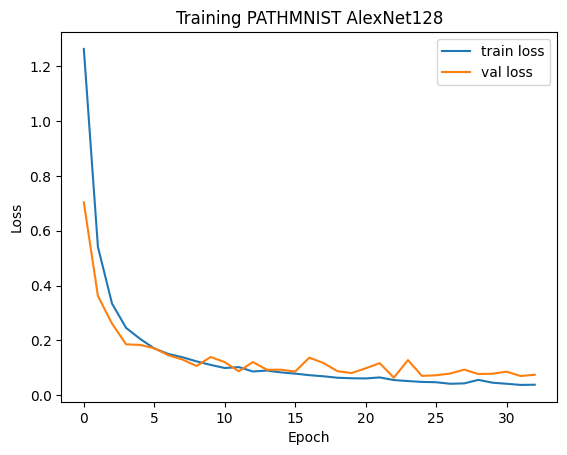

In [14]:
import matplotlib.pyplot as plt
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training PATHMNIST AlexNet128')
plt.legend()
plt.show()